In [2]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [3]:
using JSON

cross_validation_best_key_Jul_AM = readall("../temp_files/cross_validation_best_key_Jul_AM.json")
cross_validation_best_key_Jul_AM = JSON.parse(cross_validation_best_key_Jul_AM)

cross_validation_best_key_Jul_MD = readall("../temp_files/cross_validation_best_key_Jul_MD.json")
cross_validation_best_key_Jul_MD = JSON.parse(cross_validation_best_key_Jul_MD)

cross_validation_best_key_Jul_PM = readall("../temp_files/cross_validation_best_key_Jul_PM.json")
cross_validation_best_key_Jul_PM = JSON.parse(cross_validation_best_key_Jul_PM)

cross_validation_best_key_Jul_NT = readall("../temp_files/cross_validation_best_key_Jul_NT.json")
cross_validation_best_key_Jul_NT = JSON.parse(cross_validation_best_key_Jul_NT)

cross_validation_best_key_Jul_weekend = readall("../temp_files/cross_validation_best_key_Jul_weekend.json")
cross_validation_best_key_Jul_weekend = JSON.parse(cross_validation_best_key_Jul_weekend)

"(4,0.5,0.001,1)"

In [4]:
coeffs_dict_Jul_AM = readall("../temp_files/coeffs_dict_Jul_AM.json")
coeffs_dict_Jul_AM = JSON.parse(coeffs_dict_Jul_AM)

coeffs_dict_Jul_MD = readall("../temp_files/coeffs_dict_Jul_MD.json")
coeffs_dict_Jul_MD = JSON.parse(coeffs_dict_Jul_MD)

coeffs_dict_Jul_PM = readall("../temp_files/coeffs_dict_Jul_PM.json")
coeffs_dict_Jul_PM = JSON.parse(coeffs_dict_Jul_PM)

coeffs_dict_Jul_NT = readall("../temp_files/coeffs_dict_Jul_NT.json")
coeffs_dict_Jul_NT = JSON.parse(coeffs_dict_Jul_NT)

coeffs_dict_Jul_weekend = readall("../temp_files/coeffs_dict_Jul_weekend.json")
coeffs_dict_Jul_weekend = JSON.parse(coeffs_dict_Jul_weekend)


coeffs_best_Jul_AM = coeffs_dict_Jul_AM[cross_validation_best_key_Jul_AM]
coeffs_best_Jul_MD = coeffs_dict_Jul_MD[cross_validation_best_key_Jul_MD]
coeffs_best_Jul_PM = coeffs_dict_Jul_PM[cross_validation_best_key_Jul_PM]
coeffs_best_Jul_NT = coeffs_dict_Jul_NT[cross_validation_best_key_Jul_NT]
coeffs_best_Jul_weekend = coeffs_dict_Jul_weekend[cross_validation_best_key_Jul_weekend]

5-element Array{Any,1}:
  1.0        
  5.95935e-5 
  0.00156041 
 -0.00194765 
  0.000685332

INFO: Loading help data...


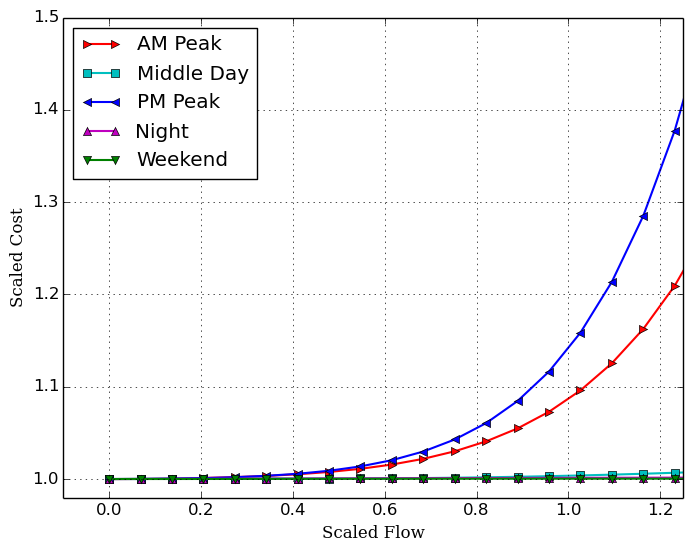

In [5]:
using PyPlot

xs = linspace(0, 1.3, 20)

#true_coeffs = [1, 0, 0, 0, .15]
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#plot(xs, ys_true, "k", label="True")

ys_Jul_AM = map(x->polyEval(coeffs_best_Jul_AM, x), xs)
ys_Jul_MD = map(x->polyEval(coeffs_best_Jul_MD, x), xs)
ys_Jul_PM = map(x->polyEval(coeffs_best_Jul_PM, x), xs)
ys_Jul_NT = map(x->polyEval(coeffs_best_Jul_NT, x), xs)
ys_Jul_weekend = map(x->polyEval(coeffs_best_Jul_weekend, x), xs)

plot(xs, ys_Jul_AM, ">-r", label="AM Peak", linewidth=1.5)
plot(xs, ys_Jul_MD, "s-c", label="Middle Day", linewidth=1.5)
plot(xs, ys_Jul_PM, "<-b", label="PM Peak", linewidth=1.5)
plot(xs, ys_Jul_NT, "^-m", label="Night", linewidth=1.5)
plot(xs, ys_Jul_weekend, "v-g", label="Weekend", linewidth=1.5)

legend(loc="upper left") 

grid("on")
xlim(-0.1, 1.25);
ylim(0.98, 1.5);

font1 = ["family"=>"serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Jul.pdf")

In [8]:
cross_validation_best_key_Jul_MD

"(8,0.5,1.0,1)"

In [6]:
coeffs_best_Jul_AM

9-element Array{Any,1}:
  1.0       
 -0.00152626
  0.0536898 
 -0.169433  
  0.494055  
 -0.698314  
  0.65968   
 -0.320054  
  0.0683666 

In [7]:
coeffs_best_Jul_MD

5-element Array{Any,1}:
  1.0       
  0.00496422
 -0.0170126 
  0.021865  
 -0.00624481

In [8]:
coeffs_best_Jul_PM

9-element Array{Any,1}:
  1.0       
 -0.00271644
  0.0580018 
 -0.196159  
  0.618985  
 -0.908986  
  0.93417   
 -0.470692  
  0.108419  

In [9]:
coeffs_best_Jul_NT

8-element Array{Any,1}:
  1.0        
  0.00123215 
  0.000426035
 -0.00034006 
  1.26039e-5 
 -3.70527e-5 
  2.75669e-5 
 -7.74173e-6 

In [10]:
coeffs_best_Jul_weekend

5-element Array{Any,1}:
  1.0        
  5.95935e-5 
  0.00156041 
 -0.00194765 
  0.000685332

In [14]:
outfile = open("../temp_files/cost_func_Jul.txt", "w")

write(outfile,"coeffs_Jul_AM: $(coeffs_best_Jul_AM) \n \
coeffs_Jul_MD: $(coeffs_best_Jul_MD) \n \
coeffs_Jul_PM: $(coeffs_best_Jul_PM) \n \
coeffs_Jul_NT: $(coeffs_best_Jul_NT) \n \
coeffs_Jul_weekend: $(coeffs_best_Jul_weekend) \n")

close(outfile)